# BCD Encoder - Decoder

In [1]:
from qiskit import *
import numpy as np
from math import pi, sqrt
import random

In [2]:
backend = Aer.get_backend('statevector_simulator')
def getBloch(quantumCircuit):
    return visualization.plot_bloch_multivector(execute(quantumCircuit, backend).result().get_statevector())

In [3]:
def stateGenerator(state):
    state = state[::-1]
    current = int(state, 2)
#     print('Current state: ', current)
    newState = [0 for i in range(0, 2**(len(state)))]
    newState[current] = 1
#     print('Init state array: ',newState)
    return newState

In [4]:
def getMeasure(quantumCircuit, n):
    measures = []
    for i in range(0,n):
        outcome = execute(quantumCircuit, backend).result()
        hist = outcome.get_counts()
        for i in hist.keys():
            measures.append(i)
        return measures

In [5]:
def makeCirc(n,num0, num1, inp):
    initState = inp
    for i in range(0, num0):
        initState += str(0)
    for i in range(0, num1):
        initState += str(1)
    print(initState)
    qr = QuantumRegister(n)
    cr = ClassicalRegister(n)
    circ = QuantumCircuit(qr, cr)
    initializedState = stateGenerator(initState)
    circ.initialize(initializedState, qr)
    return circ

In [25]:
encoderCirc = makeCirc(6,0,2, '0010')
# Decimal: 0100 = 2 (right to left) => binary: 10

001011


In [26]:
encoderCirc.x(0)
encoderCirc.x(1)
encoderCirc.x(2)
encoderCirc.ccx(0, 1, 4)
encoderCirc.ccx(0, 2, 5)

for i in range(4, 6):
    encoderCirc.measure(i, i)

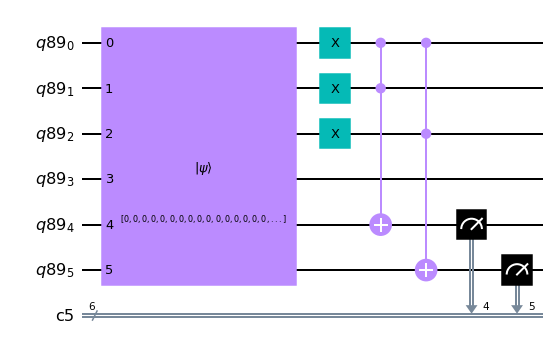

In [27]:
encoderCirc.draw();

In [28]:
getMeasure(encoderCirc, 1)[0][::-1][4:]

'01'

In [45]:
decoderCirc = makeCirc(4, 1, 1, '01')

0101


In [46]:
decoderCirc.cx(0, 3)
decoderCirc.ccx(1, 3, 2)
decoderCirc.cx(2, 1)
decoderCirc.cx(2, 3)
decoderCirc.swap(0,1)
decoderCirc.cx(0, 1)

for i in range(0, 4):
    decoderCirc.measure(i, i)

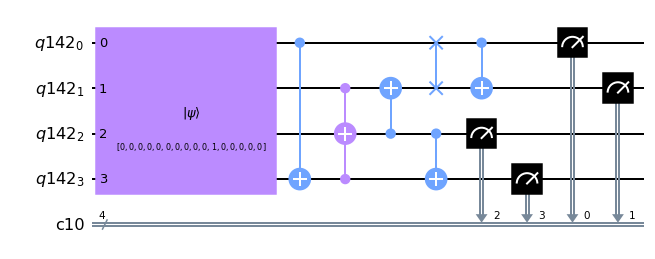

In [47]:
decoderCirc.draw();

In [48]:
getMeasure(decoderCirc, 1)[0][::-1]

'0010'

In [49]:
# Encoder gate
enCirc = QuantumCircuit(6)
enCirc.x(0)
enCirc.x(1)
enCirc.x(2)
enCirc.ccx(0, 1, 4)
enCirc.ccx(0, 2, 5)

In [50]:
Encoder = enCirc.to_gate(label =" Encoder")

In [51]:
# Decoder
deCirc = QuantumCircuit(4)
decoderCirc.cx(0, 3)
decoderCirc.ccx(1, 3, 2)
decoderCirc.cx(2, 1)
decoderCirc.cx(2, 3)
decoderCirc.swap(0,1)
decoderCirc.cx(0, 1)

In [52]:
Decoder = deCirc.to_gate(label =" Decoder")

In [53]:
circuit = QuantumCircuit(10)
circuit.append(Encoder, [0,1,2,3,4,5])
circuit.append(Decoder, [6,7,8,9])

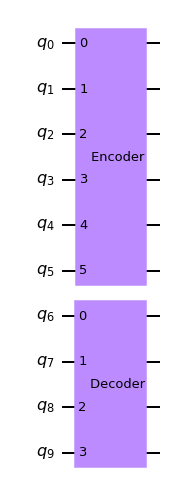

In [54]:
circuit.draw();